# ✅ Test Environnement Deep Learning

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

plt.style.use('dark_background')  # 🕶️ Dark mode

dimension de X:  (100, 2)
dimension de y:  (100, 1)


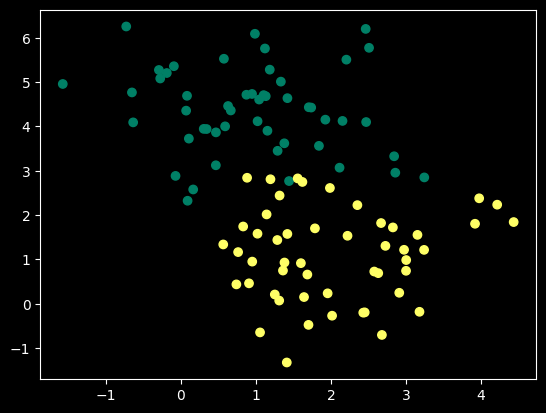

In [9]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

print('dimension de X: ', X.shape)
print('dimension de y: ', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()


In [10]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [11]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))

    return A
           


In [12]:
def log_loss(A, y):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
    

In [13]:
def gradients(A, X, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)


In [14]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)
    

In [15]:
def predict(X, W, b):
    A = model(X, W, b)
    #print(A)
    return A >= 0.5

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)

0.89


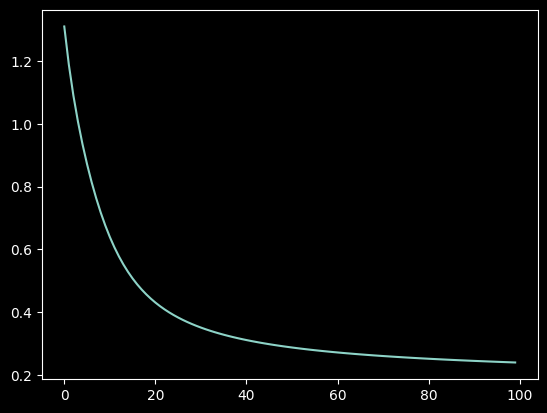

In [18]:
W, b = artificial_neuron(X, y)

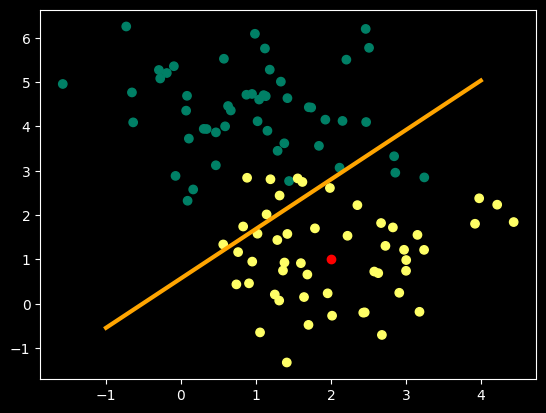

array([ True])

In [19]:
new_plant = np.array([2, 1])


x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b) / W[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c='orange', lw=3)


plt.show()
predict(new_plant, W, b)


In [20]:
from utilities import *

In [21]:
X_train, y_train, X_test, y_test = load_data()

In [22]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))


(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


In [23]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))


(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


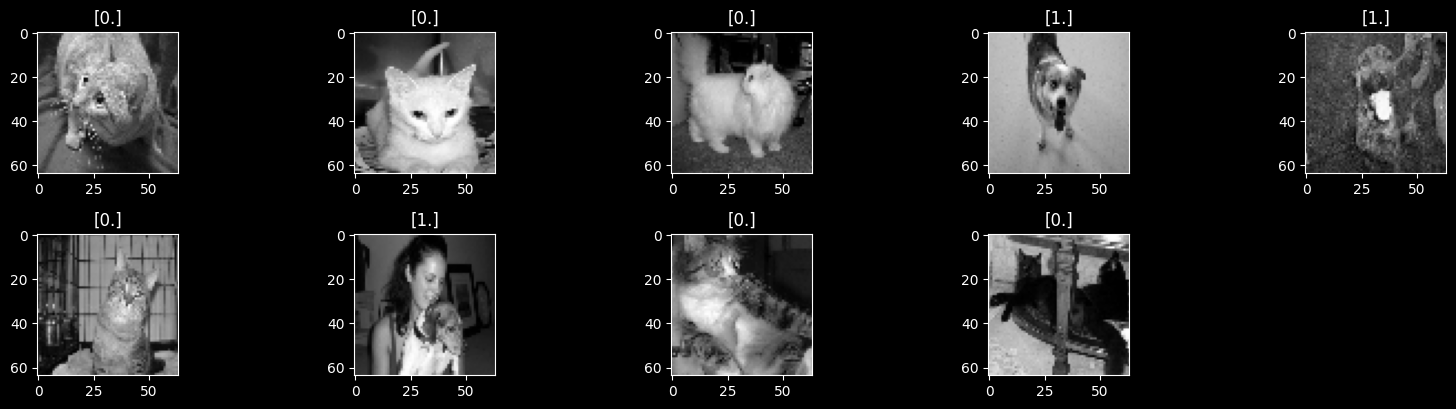

In [24]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4,5,i)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()